In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'
# os.environ['ROOK_URL'] = 'http://localhost:5000/wps'

In [2]:
from rooki import rooki
rooki.url

'http://rook.dkrz.de/wps'

## subsetting

In [3]:
collection = 'c3s-cmip6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Amon.rlds.gr.v20180803'
time = '1900-01-01/1900-12-30'

In [4]:
resp = rooki.subset(collection, time=time)
resp.ok

True

In [5]:
resp.download_urls()

['http://rook4.cloud.dkrz.de:80/outputs/rook/3835ae8a-8b35-11ec-9493-fa163ed6c06f/rlds_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19000116-19001216.nc']

### provenance for subsetting

In [6]:
prov_json_url = resp.provenance()
prov_json_url

'http://rook4.cloud.dkrz.de:80/outputs/rook/351a9328-8b35-11ec-874a-fa163ed6c06f/provenance.json'

In [7]:
import requests
requests.get(prov_json_url).json()

{'prefix': {'roocs': 'urn:roocs:',
  'provone': 'http://purl.dataone.org/provone/2015/01/15/ontology#',
  'dct': 'http://purl.org/dc/terms/'},
 'agent': {'roocs:C3S_CDS': {'prov:type': {'$': 'prov:Organization',
    'type': 'prov:QUALIFIED_NAME'},
   'prov:label': 'Copernicus Climate Data Store',
   'dct:source': 'https://cds.climate.copernicus.eu'},
  'roocs:rook_v0.7.0': {'prov:type': {'$': 'prov:SoftwareAgent',
    'type': 'prov:QUALIFIED_NAME'},
   'prov:label': 'Rook',
   'dct:source': 'https://github.com/roocs/rook/releases/tag/v0.7.0'},
  'roocs:daops_v0.7.0': {'prov:type': {'$': 'prov:SoftwareAgent',
    'type': 'prov:QUALIFIED_NAME'},
   'prov:label': 'DAOPS',
   'dct:source': 'https://github.com/roocs/daops/releases/tag/v0.7.0'}},
 'wasAttributedTo': {'_:id1': {'prov:entity': 'roocs:rook_v0.7.0',
   'prov:agent': 'roocs:C3S_CDS'}},
 'activity': {'roocs:subset_db26861f-1058-4609-a8b8-31b6a0e8ba42': {'prov:type': {'$': 'provone:Execution',
    'type': 'prov:QUALIFIED_NAME'},
  

In [8]:
prov_plot_url = resp.provenance_image()
prov_plot_url

'http://rook4.cloud.dkrz.de:80/outputs/rook/351a9328-8b35-11ec-874a-fa163ed6c06f/provenance.png'

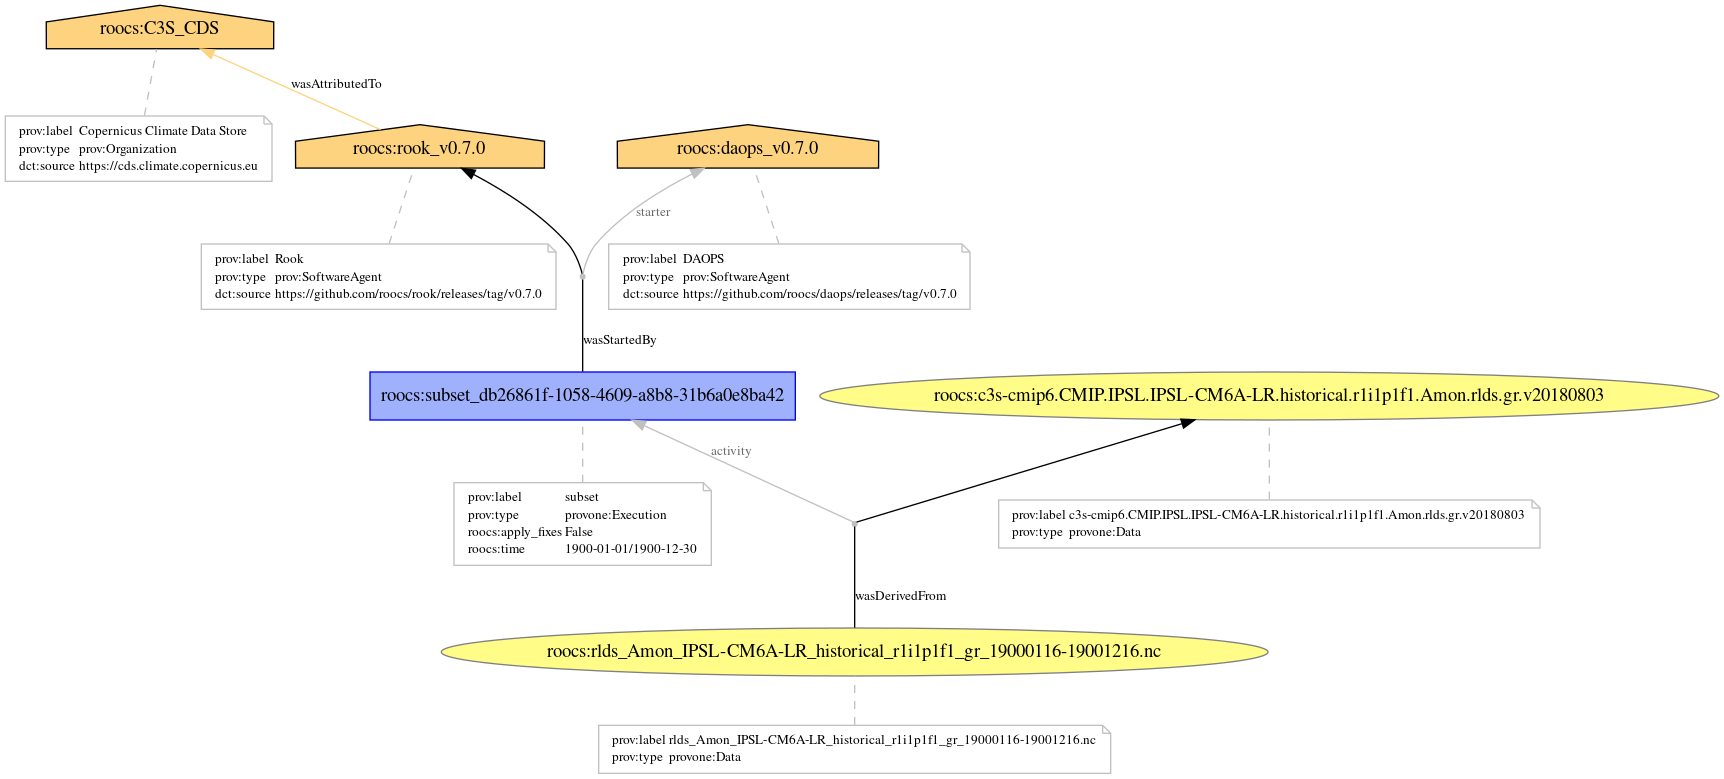

In [9]:
from IPython.display import Image
Image(prov_plot_url)

## workflow

In [10]:
from rooki import operators as ops

In [11]:
wf = ops.Subset(
    ops.Subset(
        ops.Input(
            'tas', ['c3s-cmip6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Amon.rlds.gr.v20180803']
        ),
        time="1860-01-01/1920-12-30",
    ),
    time="1880-01-01/1900-12-30"
)


In [12]:
resp = wf.orchestrate()
resp

Metalink URL: http://rook4.cloud.dkrz.de:80/outputs/rook/397111c2-8b35-11ec-b5da-fa163ed6c06f/input.meta4, num files: 1

In [13]:
resp.download_urls()

['http://rook4.cloud.dkrz.de:80/outputs/rook/3ebd489e-8b35-11ec-8abc-fa163ed6c06f/rlds_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18800116-19001216.nc']

### provenance

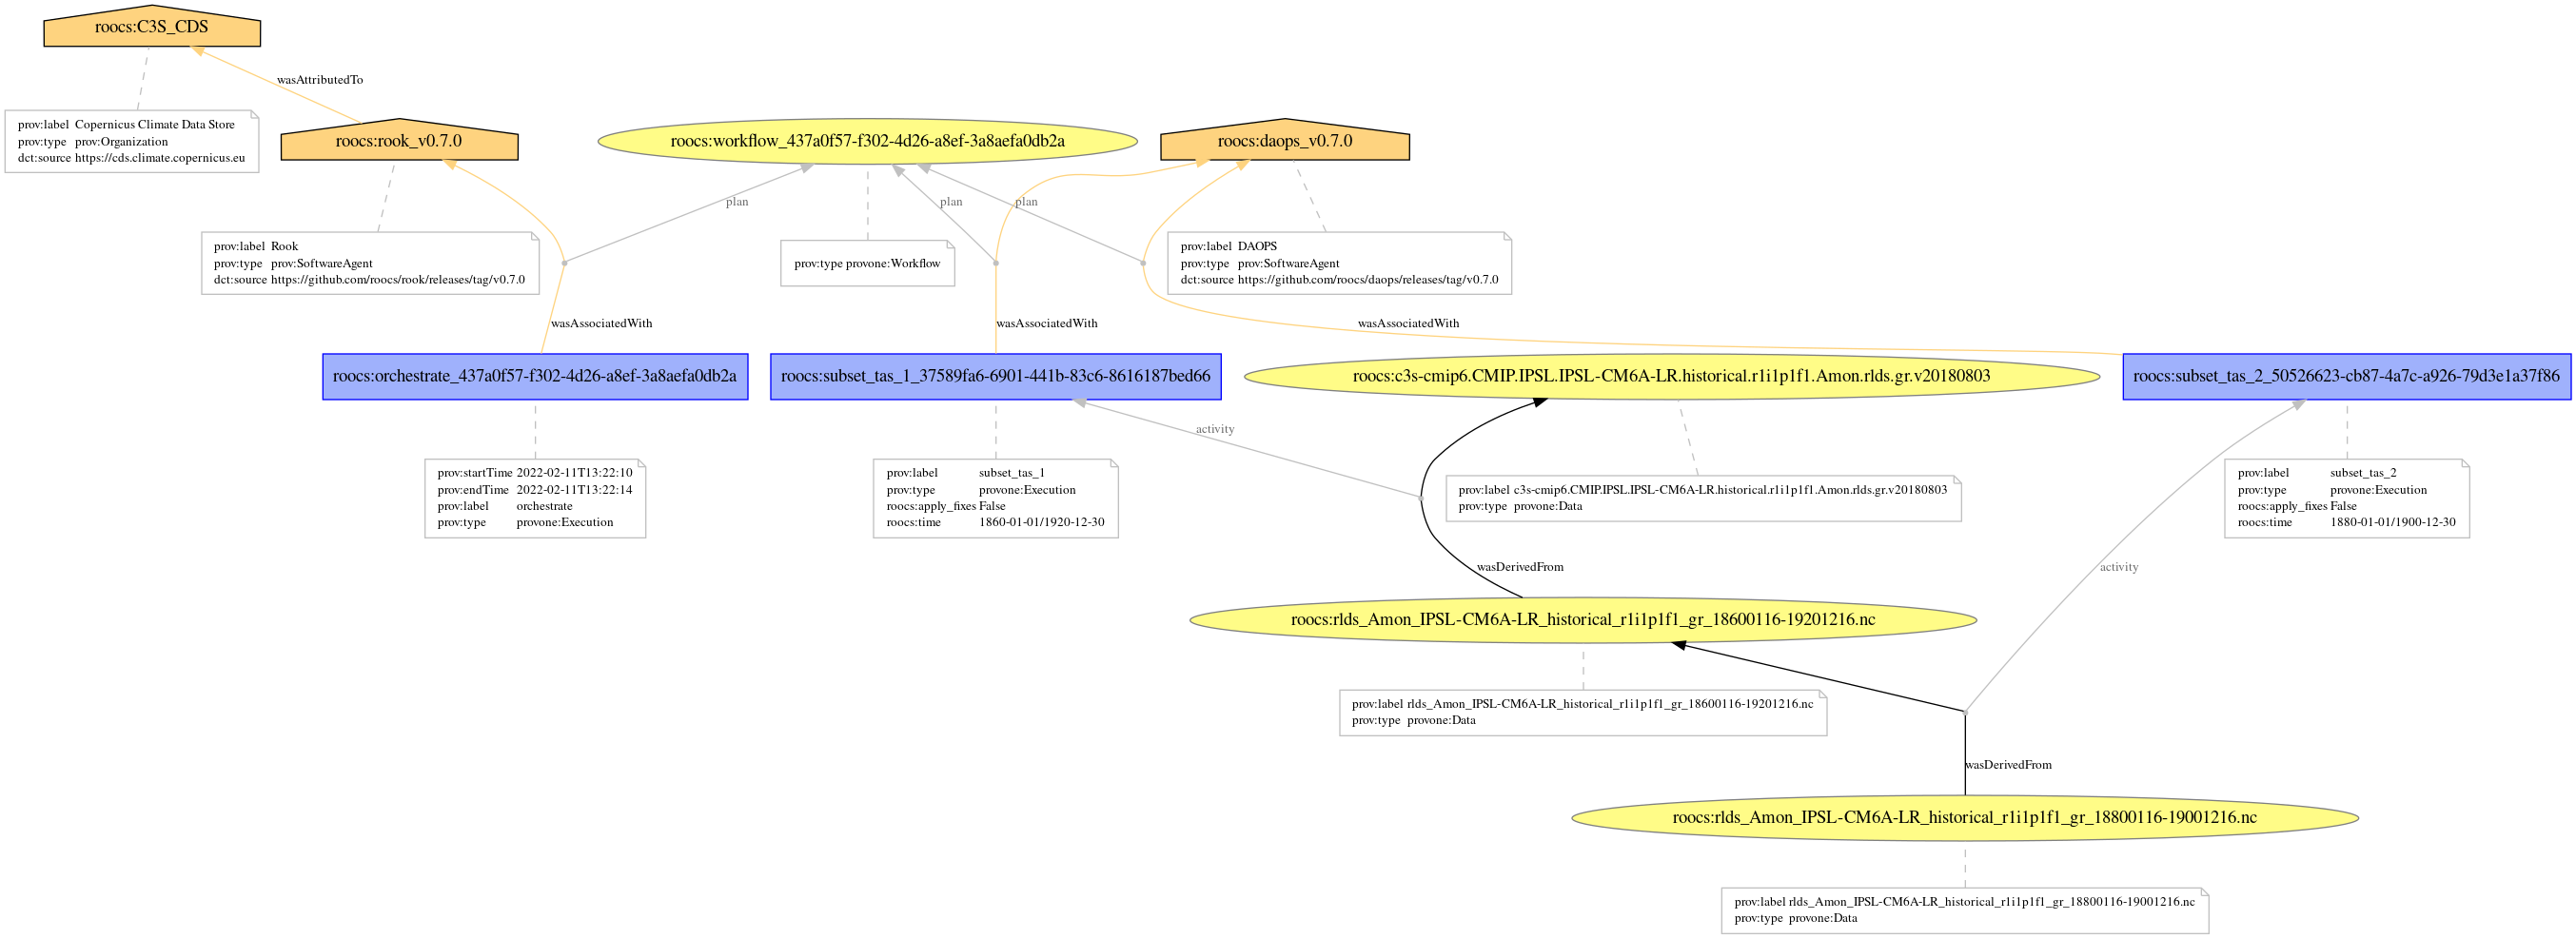

In [14]:
from IPython.display import Image
Image(resp.provenance_image())